# Software Defect Detection


## 1. Introduction

Software defect detection is an application area that employs machine learning models for automatically identifying defective parts in programs.

In this assignment you will explore various classifiers with multiple datasets. The purpose is to measure the performance of the following well-established algorithms in software defect detection tasks.


### Classifiers
The classifiers to be studied are:
* $C_1$: Logistic Regression
* $C_2$: Perceptron
* $C_3$: Support Vector Machines (with linear &amp; RBF kernel)
* $C_4$: Decision Tree
* $C_5$: Random Forests
* $C_6$: Feed-forward Neural Network


### Datasets
The classification performance of the abovementioned algorithm will be studied in a collection of 3 datasets on software defect detection. The datasets are:

* `jm1` (Description [here](https://www.openml.org/search?type=data&status=active&id=1053))
* `mc1` (Description [here](https://www.openml.org/search?type=data&status=active&id=1056))
* `pc3` (Description [here](https://www.openml.org/search?type=data&status=active&id=1050))

**All datasets are provided with the assignment in the present compressed file.**

There cases of missing values in the datasets. These cases should be addressed by removing the **rows** with missing values.


## 2. Experiments

You will use 80% of the datasets for training and 20% for testing by applying the 5-fold cross validation technique. The algorithms will be evaluated by measuring the values of the four following well-established metrics:
* $M_1$: Accuracy
* $M_2$: F1-score
* $M_3$: G-Mean score
* $M_4$: Fit time

Repeat your experiments with different features' normalization methods:
* $N_1$: No normalization (use raw features)
* $N_2$: Min-max normalization
* $N_3$: Feature Standardization



## 3. Deliverable & Deadline

You will work in pairs according to your preferences.

The deliverable will be a notebook, using both surnames as a file name. This file should include the code and the results for each one of the 3 datasets. Both students of a team must upload the same file into the e-learning platform. **Only one file per pair will be checked. So, if you upload different versions, then one of them will not be examined. You are free to use any Python library, even if it is not a part of Anaconda3. However, in the latter case, please make sure that you mention the appropriate conda or pip command for installing the library.**

**For each dataset, your notebook should present:**

* 4 bar plots that will compare the performance ($M1$, $M2$, $M3$, and $M4$) of the six classifiers ($C1$, $C2$, $C3$, $C4$, $C5$, and $C6$) for the cases $N_1$, $N_2$, and $N_3$ (please consult the example in the figure below).
* A discussion on the performance of the classifiers.

**The deadline is 30/01/2024. NO DEADLINE EXTENSION WILL BE GIVEN.**

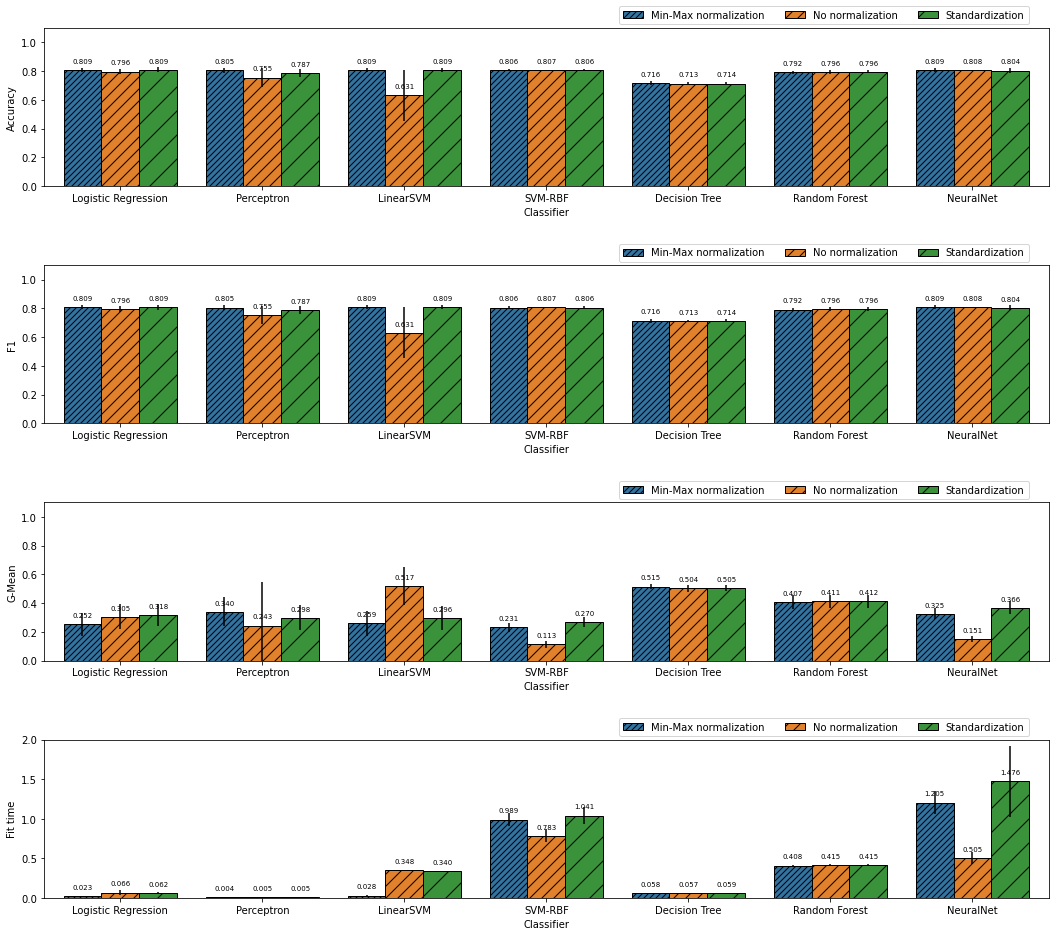

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
set1 = pd.read_csv('jm1.csv',sep=",")
set1.replace('?', float(0), inplace=True)

Y = np.array(set1.iloc[:, 21].astype(int))

X = np.array(set1.iloc[:, :21])

print(X)


[[1.1 1.4 1.4 ... '1.2' '1.2' '1.4']
 [1.0 1.0 1.0 ... '1' '1' '1']
 [72.0 7.0 1.0 ... '112' '86' '13']
 ...
 [42.0 4.0 1.0 ... '59' '44' '7']
 [10.0 1.0 1.0 ... '21' '15' '1']
 [19.0 3.0 1.0 ... '31' '27' '5']]


In [7]:
import warnings

from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import make_scorer, f1_score, accuracy_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")



scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted')
}



cv= 5 

cv_results = cross_validate(LogisticRegression(solver='liblinear',max_iter=1000), X, Y, cv=cv, scoring=scorers, return_train_score=True)
cv_Results_perceptron = cross_validate(Perceptron(),X,Y,cv=cv,scoring=scorers,return_train_score = True)
cv_results_svm = cross_validate(SVC(kernel="linear",max_iter = 1000),X,Y,cv=cv,scoring=scorers,return_train_score = True)
cv_results_svm_rbf = cross_validate(SVC(kernel="rbf",max_iter = 1000),X,Y,cv=cv,scoring=scorers,return_train_score = True)
cv_results_dec_tree = cross_validate(DecisionTreeClassifier(), X, Y, cv=cv,scoring=scorers,return_train_score = True)


print(cv_results['fit_time'].mean())


print("Accuracy:", cv_results['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results['test_balanced_accuracy_score'].mean())
print("F1:", cv_results['test_f1_score'].mean())

print("Accuracy:", cv_Results_perceptron['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_Results_perceptron['test_balanced_accuracy_score'].mean())
print("F1:",  cv_Results_perceptron['test_f1_score'].mean())

print("Accuracy:", cv_results_svm['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results_svm['test_balanced_accuracy_score'].mean())
print("F1:", cv_results_svm['test_f1_score'].mean())


print("Accuracy:", cv_results_svm_rbf['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results_svm_rbf['test_balanced_accuracy_score'].mean())
print("F1:", cv_results_svm_rbf['test_f1_score'].mean())


print("Accuracy:", cv_results_dec_tree['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results_dec_tree['test_balanced_accuracy_score'].mean())
print("F1:", cv_results_dec_tree['test_f1_score'].mean())

1.1291976928710938
Accuracy: 0.8075333027101514
Balanced Accuracy: 0.5403052966571534
F1: 0.7515758859496309
Accuracy: 0.806614607257694
Balanced Accuracy: 0.5050986226390825
F1: 0.7246646479550944
Accuracy: 0.31731740927882407
Balanced Accuracy: 0.47279827416004017
F1: 0.24868336494079551
Accuracy: 0.19136426274689938
Balanced Accuracy: 0.48175198816301945
F1: 0.07333206729983247
Accuracy: 0.7159393661001378
Balanced Accuracy: 0.5688921028749212
F1: 0.7220128948390241


In [8]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(solver='liblinear'))])
pipePerceptron = Pipeline([('scaler', StandardScaler()), ('perceptron', Perceptron())])
pipeSvm = Pipeline([ ('scaler', StandardScaler()), ('svm', SVC(kernel='linear',max_iter = 10000))])
pipeSvmRBF = Pipeline([ ('scaler', StandardScaler()), ('svm', SVC(kernel='rbf',max_iter=10000))])
pipeTree = Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())])

cv_resultsStandard = cross_validate(pipe, X, Y, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandardPerceptron = cross_validate(pipePerceptron, X, Y, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandardSVM = cross_validate(pipeSvm,X,Y,cv=cv,scoring=scorers,return_train_score = True)
cv_resultsStandardSVMrbf = cross_validate(pipeSvmRBF,X,Y,cv=cv,scoring=scorers,return_train_score = True)
cv_resultsStandardDecTree = cross_validate(pipeTree,X,Y,cv=cv,scoring=scorers,return_train_score = True)

print("Accuracy:", cv_resultsStandard['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard['test_f1_score'].mean())
                           
print("Accuracy:", cv_resultsStandardPerceptron['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandardPerceptron['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandardPerceptron['test_f1_score'].mean())                  


print("Accuracy:", cv_resultsStandardSVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandardSVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandardSVM['test_f1_score'].mean())


print("Accuracy:", cv_resultsStandardSVMrbf['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandardSVMrbf['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandardSVMrbf['test_f1_score'].mean())


Accuracy: 0.8086357372531007
Balanced Accuracy: 0.542791609555275
F1: 0.753485267089729
Accuracy: 0.7540652273771246
Balanced Accuracy: 0.5172895865198901
F1: 0.7220427773982747
Accuracy: 0.8068902158934315
Balanced Accuracy: 0.503112535930883
F1: 0.7230630988488141
Accuracy: 0.8059715204409738
Balanced Accuracy: 0.5285312281222352
F1: 0.7436180749251307


In [6]:
pipeMinMax = Pipeline([('scaler', MinMaxScaler()), ('logistic', LogisticRegression(solver='liblinear'))])
pipeMinMaxPerceptron = Pipeline([('scaler', MinMaxScaler()), ('perceptron', Perceptron())])
pipeMinMaxSVM = Pipeline([('scaler', MinMaxScaler()), ('svm',SVC(kernel='linear',max_iter = 250))])
pipeMinMaxSVMRBF = Pipeline([('scaler', MinMaxScaler()), ('svm',SVC(kernel='rbf',max_iter = 250))])
pipeMinMaxDecTree = Pipeline([('scaler', MinMaxScaler()), ('classifier', DecisionTreeClassifier())])

cv_resultsMinMax = cross_validate(pipeMinMax, X, Y, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMaxPerc = cross_validate(pipeMinMaxPerceptron, X, Y, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMaxSVM = cross_validate(pipeMinMaxSVM,X,Y,cv=cv,scoring=scorers,return_train_score=True)
cv_resultsMinMaxSVMRBF = cross_validate(pipeMinMaxSVMRBF,X,Y,cv=cv,scoring=scorers,return_train_score=True)
cv_resultsMinMaxDecTree = cross_validate(pipeMinMaxDecTree,X,Y,cv=cv,scoring = scorers,return_train_score=True)

print("Accuracy:", cv_resultsMinMax['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMaxPerc['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMaxPerc['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMaxPerc['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMaxSVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMaxSVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMaxSVM['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMaxDecTree['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMaxDecTree['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMaxDecTree['test_f1_score'].mean())

C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early 

Accuracy: 0.8087276067983463
Balanced Accuracy: 0.528053404113726
F1: 0.7434313328115485
Accuracy: 0.8082682590721175
Balanced Accuracy: 0.5673993846573301
F1: 0.7599922799538044
Accuracy: 0.1908130454754249
Balanced Accuracy: 0.4915052668434933
F1: 0.06342630159310696


Text(0, 0.5, 'Values')

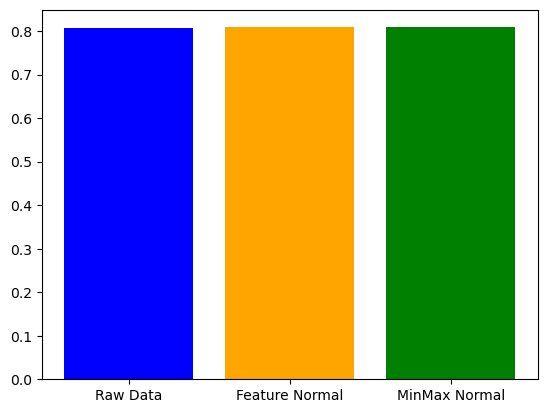

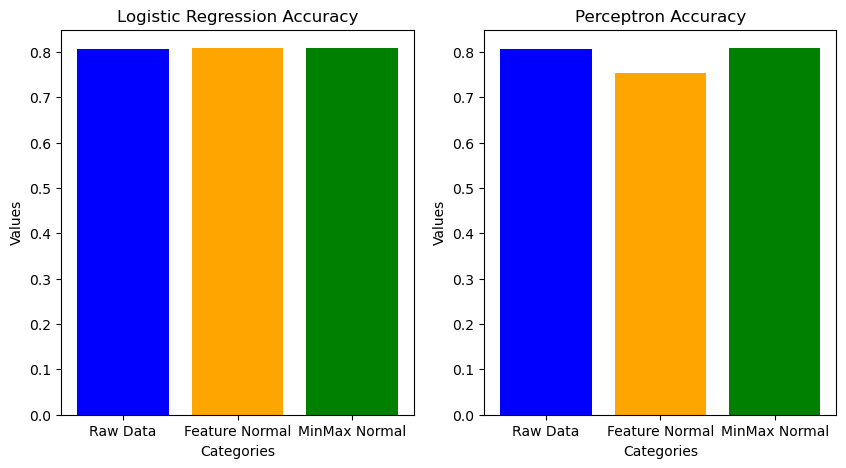

In [19]:
values = [cv_results['test_accuracy_score'].mean(),cv_resultsStandard['test_accuracy_score'].mean(),cv_resultsMinMax['test_accuracy_score'].mean()]
categories = ["Raw Data","Feature Normal","MinMax Normal"]                                                                                                                    
colors = ['blue', 'orange', 'green']
plt.bar(categories, values,color = colors)
valuesPerceptron = [cv_Results_perceptron['test_accuracy_score'].mean(),cv_resultsStandardPerceptron['test_accuracy_score'].mean(),cv_resultsMinMaxPerc['test_accuracy_score'].mean()]


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plotting the first bar plot
axes[0].bar(categories, values, color=colors)
axes[0].set_title('Logistic Regression Accuracy')
axes[0].set_xlabel('Categories')
axes[0].set_ylabel('Values')

# Plotting the second bar plot
axes[1].bar(categories, valuesPerceptron, color=colors)
axes[1].set_title('Perceptron Accuracy')
axes[1].set_xlabel('Categories')
axes[1].set_ylabel('Values')




In [4]:
#Set2 Raw Data
set2 = pd.read_csv('mc1.csv',sep=",")

Y2 = np.array(set2.iloc[:, 38].astype(int))
X2 = np.array(set2.iloc[:,:38])


cv= 5 

cv_results2 = cross_validate(LogisticRegression(solver='liblinear',max_iter=1000), X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_results2Perc = cross_validate(Perceptron(), X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_results2SVM = cross_validate(SVC(kernel="linear",max_iter = 500),X2,Y2,cv=cv,scoring=scorers,return_train_score = True)
cv_results2SVM = cross_validate(SVC(kernel="rbf",max_iter = 500),X2,Y2,cv=cv,scoring=scorers,return_train_score = True)
cv_results2DecTree = cross_validate(DecisionTreeClassifier(), X2, Y2, cv=cv,scoring=scorers,return_train_score = True)


# print(cv_results)
print("Accuracy:", cv_results2['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results2['test_balanced_accuracy_score'].mean())
print("F1:", cv_results2['test_f1_score'].mean())

print("Accuracy:", cv_results2Perc['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results2Perc['test_balanced_accuracy_score'].mean())
print("F1:", cv_results2Perc['test_f1_score'].mean())

print("Accuracy:", cv_results2SVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results2SVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_results2SVM['test_f1_score'].mean())

C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.9933445679659011
Balanced Accuracy: 0.5875396908697499
F1: 0.9913467280760763
Accuracy: 0.9626084764019722
Balanced Accuracy: 0.4847835256417515
F1: 0.9735343468058881
Accuracy: 0.21067005602254957
Balanced Accuracy: 0.47258183306055646
F1: 0.21088837488056375


C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [8]:
#Set 2 StandardScaling
pipe2 = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(solver='liblinear'))])
pipe2Perc =  Pipeline([('scaler', StandardScaler()), ('perceptron', Perceptron())])

cv_resultsStandard2 = cross_validate(pipe2, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard2Perc = cross_validate(pipe2Perc, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard2SVM = cross_validate(pipeSvm, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard2SVMrbf = cross_validate(pipeSvmRbf, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard2DecTree = cross_validate(pipeTree,X2,Y2,cv=cv,scoring=scorers,return_train_score=True)

print("Accuracy:", cv_resultsStandard2['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard2['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard2['test_f1_score'].mean())

print("Accuracy:", cv_resultsStandard2Perc['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard2Perc['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard2Perc['test_f1_score'].mean())


print("Accuracy:", cv_resultsStandard2SVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard2SVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard2SVM['test_f1_score'].mean())

print("Accuracy:", cv_resultsStandard2SVMrbf['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard2SVMrbf['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard2SVMrbf['test_f1_score'].mean())


print("Accuracy:", cv_resultsStandard2DecTree['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard2DecTree['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard2DecTree['test_f1_score'].mean())

C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early 

Accuracy: 0.9936614693939937
Balanced Accuracy: 0.5675292260930559
F1: 0.9910981044221465
Accuracy: 0.990280871392464
Balanced Accuracy: 0.5718171552779991
F1: 0.9889738082140292
Accuracy: 0.665201646035441
Balanced Accuracy: 0.5455690813381924
F1: 0.7258094737783044


In [9]:
#Set2 MinMaxScaling
pipeMinMax2 = Pipeline([('scaler', MinMaxScaler()), ('logistic', LogisticRegression(solver='liblinear'))])
pipeMinMax2Perc = Pipeline([('scaler', MinMaxScaler()), ('perceptron', Perceptron())])

cv_resultsMinMax2 = cross_validate(pipeMinMax2, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax2Perc = cross_validate(pipeMinMax2Perc, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax2SVM = cross_validate(pipeMinMaxSVM, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax2SVMrbf = cross_validate(pipeMinMaxSVMRBF, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax2DecTree = cross_validate(pipeMinMaxDecTree,X2,Y2,cv=cv,scoring=scorers,return_train_score=True)

print("Accuracy:", cv_resultsMinMax2['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax2['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax2['test_f1_score'].mean())


print("Accuracy:", cv_resultsMinMax2Perc['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax2Perc['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax2Perc['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMax2SVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax2SVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax2SVM['test_f1_score'].mean())


print("Accuracy:", cv_resultsMinMax2SVMrbf['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax2SVMrbf['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax2SVMrbf['test_f1_score'].mean())


print("Accuracy:", cv_resultsMinMax2DecTree['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax2DecTree['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax2DecTree['test_f1_score'].mean())


C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.9929220699169006
Balanced Accuracy: 0.5076923076923077
F1: 0.9894862788957262
Accuracy: 0.9926051684888082
Balanced Accuracy: 0.5075326766074164
F1: 0.9893277603218967
Accuracy: 0.9928164175133084
Balanced Accuracy: 0.5
F1: 0.9892375905805931


C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [24]:
values2 = [cv_results2['test_accuracy_score'].mean(),cv_resultsStandard2['test_accuracy_score'].mean(),cv_resultsMinMax2['test_accuracy_score'].mean()]
values2Perc = [cv_results2Perc['test_accuracy_score'].mean(),cv_resultsStandard2Perc['test_accuracy_score'].mean(),cv_resultsMinMax2Perc['test_accuracy_score'].mean()]



In [10]:
set3 = pd.read_csv('pc3.csv',sep=",")

Y3 = np.array(set3.iloc[:, 37].astype(int))
X3 = np.array(set3.iloc[:,:37])


In [11]:
#Set3 Raw Data
cv= 5 

cv_results3 = cross_validate(LogisticRegression(solver='liblinear',max_iter=1000), X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_results3Perc = cross_validate(Perceptron(), X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_results3SVM = cross_validate(SVC(kernel="linear",max_iter = 500),X3,Y3,cv=cv,scoring=scorers,return_train_score = True)
cv_results3SVMrbf = cross_validate(SVC(kernel="rbf",max_iter = 500),X3,Y3,cv=cv,scoring=scorers,return_train_score = True)
cv_results3DecTree = cross_validate(DecisionTreeClassifier(), X2, Y2, cv=cv,scoring=scorers,return_train_score = True)

#print(cv_results['fit_time'].mean())

print("Accuracy:", cv_results3['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results3['test_balanced_accuracy_score'].mean())
print("F1:", cv_results3['test_f1_score'].mean())


print("Accuracy:", cv_results3Perc['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results3Perc['test_balanced_accuracy_score'].mean())
print("F1:", cv_results3Perc['test_f1_score'].mean())


print("Accuracy:", cv_results3SVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results3SVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_results3SVM['test_f1_score'].mean())


print("Accuracy:", cv_results3SVMrbf['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results3SVMrbf['test_balanced_accuracy_score'].mean())
print("F1:", cv_results3SVMrbf['test_f1_score'].mean())


print("Accuracy:", cv_results3DecTree['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results3DecTree['test_balanced_accuracy_score'].mean())
print("F1:", cv_results3DecTree['test_f1_score'].mean())

C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early 

Accuracy: 0.9001863684771033
Balanced Accuracy: 0.5872512074224707
F1: 0.8780455970045266
Accuracy: 0.5606189071844023
Balanced Accuracy: 0.4230427046263345
F1: 0.6238651245722577
Accuracy: 0.37777504710412063
Balanced Accuracy: 0.5481615404168785
F1: 0.3708893947647517


In [12]:
pipe3 = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(solver='liblinear'))])

cv_resultsStandard3 = cross_validate(pipe3, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard3Perc = cross_validate(pipePerceptron, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard3SVM = cross_validate(pipeSvm, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard3SVMrbf = cross_validate(pipeSvmRbf, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard3DecTree = cross_validate(pipeTree,X3,Y3,cv=cv,scoring=scorers,return_train_score=True)

# print(cv_results)

print("Accuracy:", cv_resultsStandard3['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard3['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard3['test_f1_score'].mean())


print("Accuracy:", cv_resultsStandard3Perc['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard3Perc['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard3Perc['test_f1_score'].mean())

print("Accuracy:", cv_resultsStandard3SVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard3SVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard3SVM['test_f1_score'].mean())



C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.8989084132055378
Balanced Accuracy: 0.5588532663955263
F1: 0.8706477839811881
Accuracy: 0.8637646432374867
Balanced Accuracy: 0.5586654804270463
F1: 0.8455998927872562
Accuracy: 0.5279061194396657
Balanced Accuracy: 0.6124507498729028
F1: 0.6081387476620037


C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [13]:
pipeMinMax3 = Pipeline([('scaler', MinMaxScaler()), ('logistic', LogisticRegression(solver='liblinear'))])

cv_resultsMinMax3 = cross_validate(pipeMinMax3, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax3Perc = cross_validate(pipeMinMaxPerceptron, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax3SVM = cross_validate(pipeMinMaxSVM, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax3SVMrbf =  cross_validate(pipeMinMaxSVMRBF, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax3DecTree = cross_validate(pipeMinMaxDecTree,X3,Y3,cv=cv,scoring=scorers,return_train_score=True)

print("Accuracy:", cv_resultsMinMax3['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax3['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax3['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMax3Perc['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax3Perc['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax3Perc['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMax3SVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax3SVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax3SVM['test_f1_score'].mean())

C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.8969914802981895
Balanced Accuracy: 0.5162538129130656
F1: 0.8555395855807637
Accuracy: 0.870770869173425
Balanced Accuracy: 0.5597944204372141
F1: 0.8510483237452962
Accuracy: 0.8976325059392153
Balanced Accuracy: 0.5
F1: 0.8492098658232845


C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Michalis\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


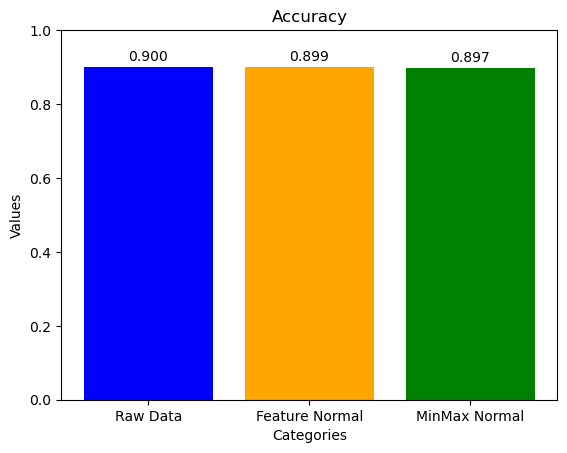

In [40]:
values3 = [cv_results3['test_accuracy_score'].mean(),cv_resultsStandard3['test_accuracy_score'].mean(),cv_resultsMinMax3['test_accuracy_score'].mean()]

plt.bar(categories, values3,color = colors)
for i, value in enumerate(values3):
    plt.annotate(f'{value:.3f}', xy=(i, value), xytext=(i, value + 0.01), ha='center', va='bottom')  

plt.ylim(0,1)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Accuracy')

plt.show()